# QUESTION 1

### Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [18]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


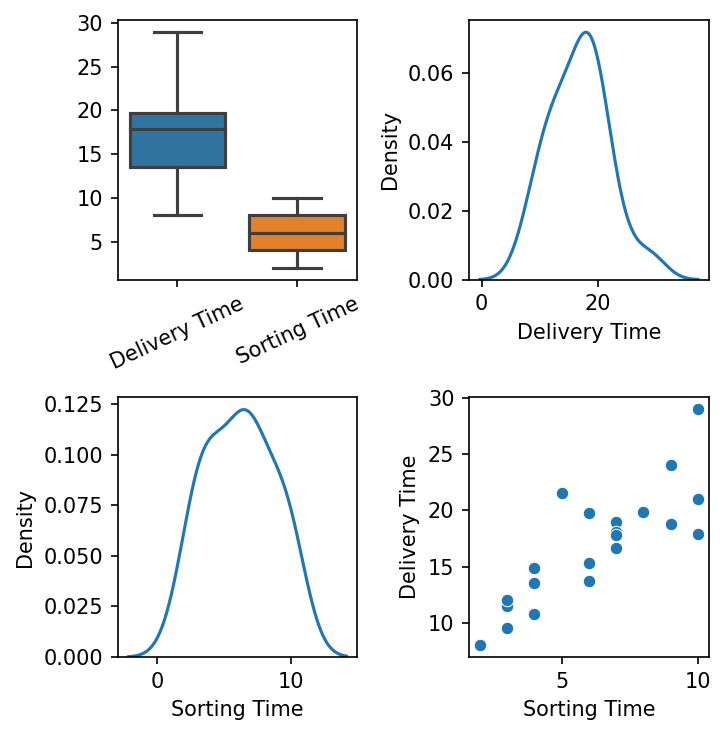

In [13]:
plt.subplot(2,2,1)
sns.boxplot(df)
plt.xticks(rotation = 25)
plt.subplot(2,2,2)
sns.kdeplot(data = df, x = 'Delivery Time')
plt.subplot(2,2,3)
sns.kdeplot(data = df, Sx = 'Sorting Time')
plt.subplot(2,2,4)
sns.scatterplot(data = df, x = 'Sorting Time', y = 'Delivery Time')
plt.tight_layout()

In [14]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

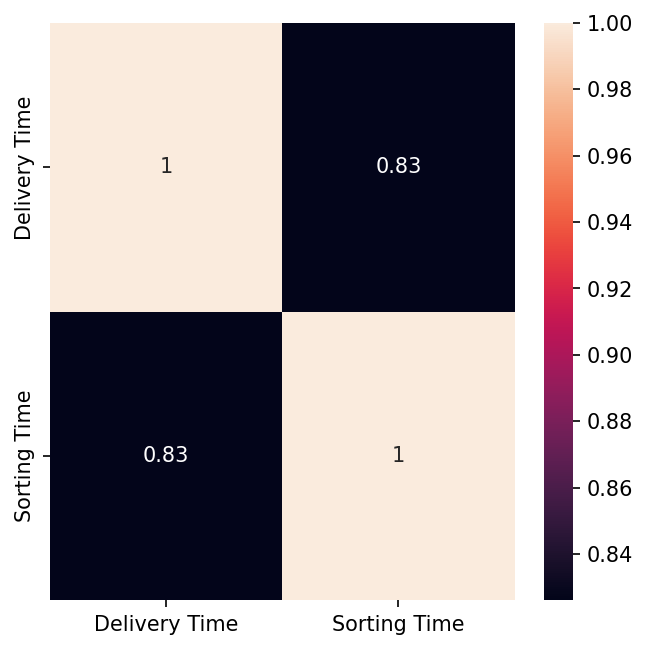

In [16]:
sns.heatmap(df.corr(), annot=True)

- normalizing data to bring data dowm to same magnitude for better model performance
- we use normalization or minmax scaling to bring delivery time and sorting time to a same range of values for better model perfromance
- we can comapre the check the boxplot below that both the data are in same scale

In [121]:
norm_df = pd.DataFrame(MinMaxScaler().fit_transform(df),columns=df.columns)
norm_df.head()

,Delivery Time,Sorting Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


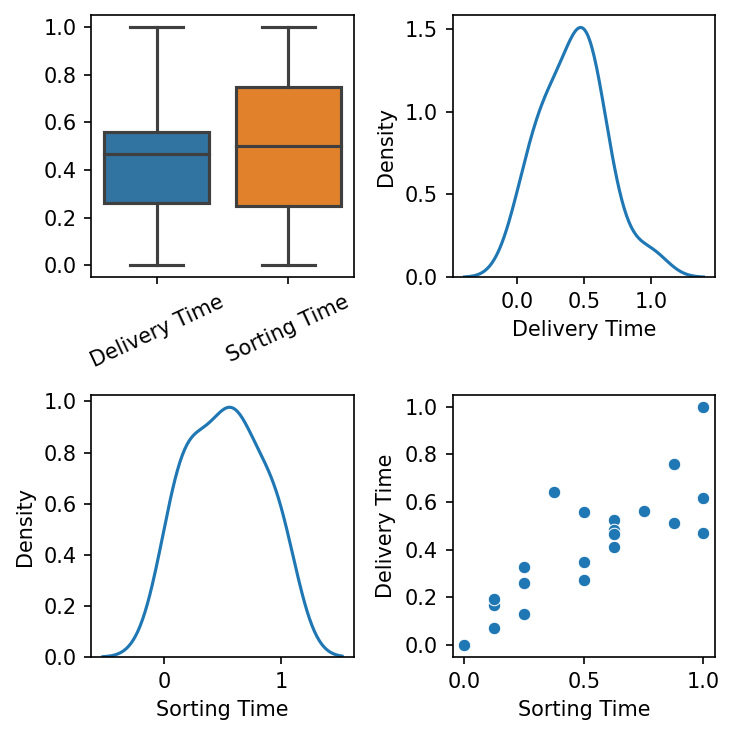

In [110]:
plt.subplot(2,2,1)
sns.boxplot(norm_df)
plt.xticks(rotation = 25)
plt.subplot(2,2,2)
sns.kdeplot(data = norm_df, x = 'Delivery Time')
plt.subplot(2,2,3)
sns.kdeplot(data = norm_df, x = 'Sorting Time')
plt.subplot(2,2,4)
sns.scatterplot(data = norm_df, x = 'Sorting Time', y = 'Delivery Time')
plt.tight_layout()

### DATA SPLITTING

In [112]:
x = np.array(norm_df['Sorting Time']).reshape((-1, 1))
y = norm_df['Delivery Time']

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [114]:
len(x_train),len(y_train),len(x_test),len(y_test)

(16, 16, 5, 5)

### TRAINING  MODEL & PREDITICIONS 

In [115]:
model = LinearRegression()

In [116]:
model.fit(x_train, y_train)

LinearRegression()

In [117]:
y_pred = model.predict(x_test)

### MODEL EVALUATION

In [122]:
norm_df['Delivery Time'].mean()

0.4186167800453514

In [123]:
r2_score(y_test,y_pred)

0.8035981073023993

In [124]:
mean_absolute_error(y_test,y_pred)

0.11558906011384149

In [125]:
mean_squared_error(y_test,y_pred)

0.01648261689056281

In [126]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [127]:
residual = y_test - y_pred

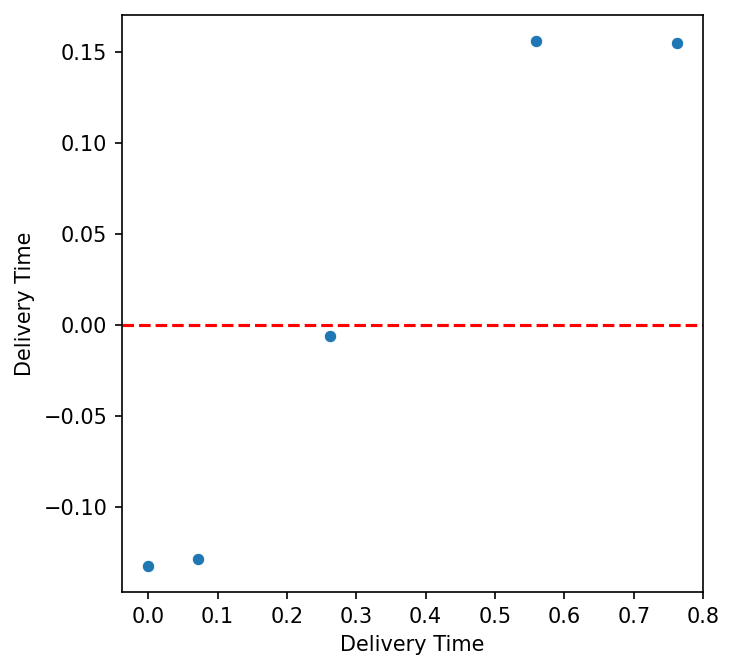

In [128]:
sns.scatterplot(x = y_test,y = residual)
plt.axhline(color = 'red', linestyle = '--')

#### interpretation
- as we can see from the r2 value itself that the model is perfroming good, value of r2 near to 1 shows model is perfroming good
- from the residual plot we cant observe any pattern, so from this we can visually evaluate the model and hence we can say that our model performed well

# QUESTION 2

In [49]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### EDA

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [58]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


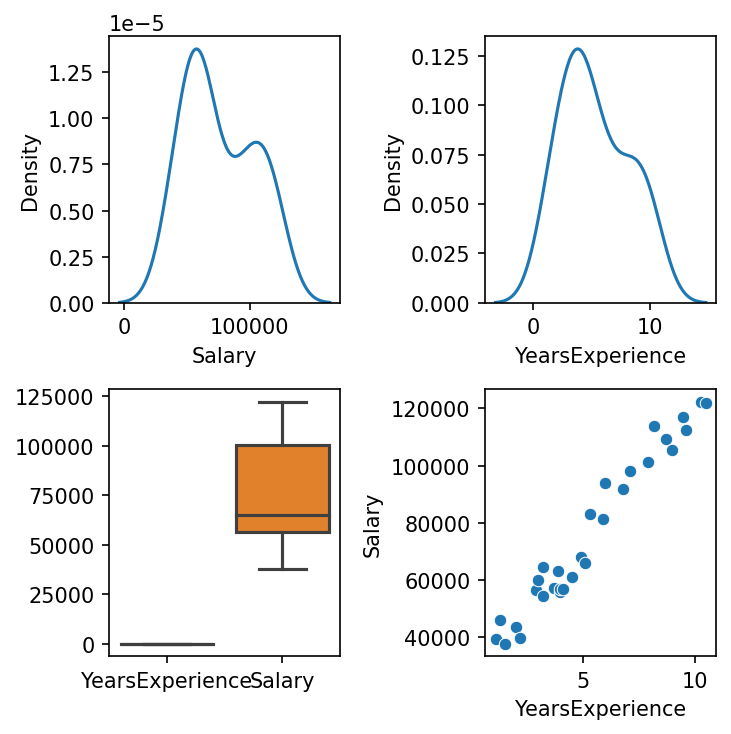

In [59]:
plt.subplot(2,2,3)
sns.boxplot(data)
plt.subplot(2,2,2)
sns.kdeplot(data = data, x = 'YearsExperience')
plt.subplot(2,2,1)
sns.kdeplot(data = data, x = 'Salary')
plt.subplot(2,2,4)
sns.scatterplot(data = data, x = 'YearsExperience', y = 'Salary')
plt.tight_layout()

<Axes: >

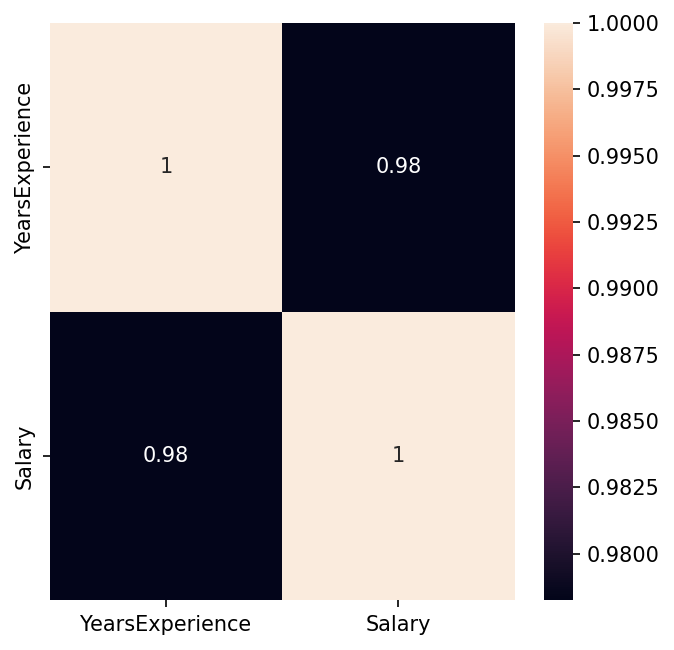

In [60]:
sns.heatmap(data.corr(), annot=True)

In [51]:
norm_data = pd.DataFrame(MinMaxScaler().fit_transform(data),columns=data.columns)

In [61]:
norm_data.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


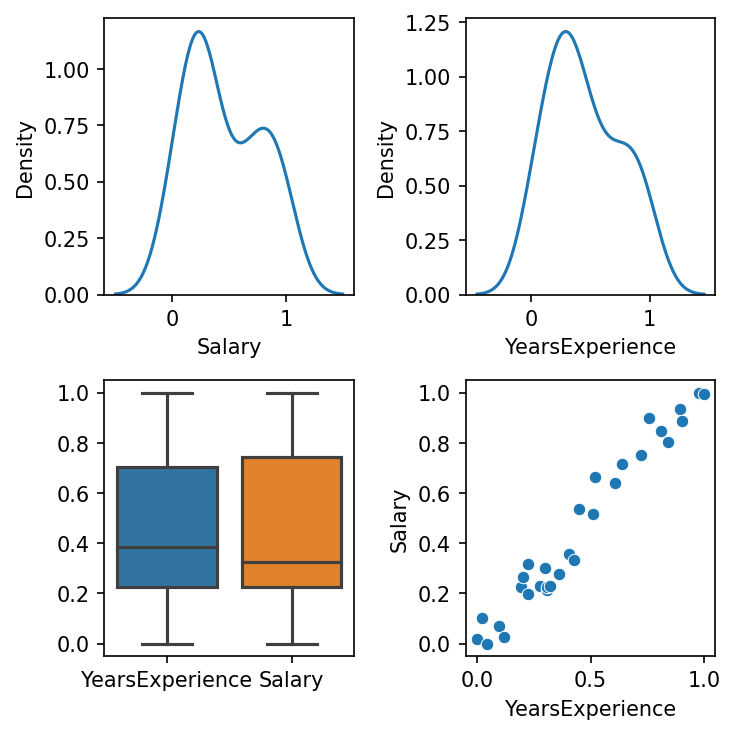

In [62]:
plt.subplot(2,2,3)
sns.boxplot(norm_data)
plt.subplot(2,2,2)
sns.kdeplot(data = norm_data, x = 'YearsExperience')
plt.subplot(2,2,1)
sns.kdeplot(data = norm_data, x = 'Salary')
plt.subplot(2,2,4)
sns.scatterplot(data = norm_data, x = 'YearsExperience', y = 'Salary')
plt.tight_layout()

<Axes: >

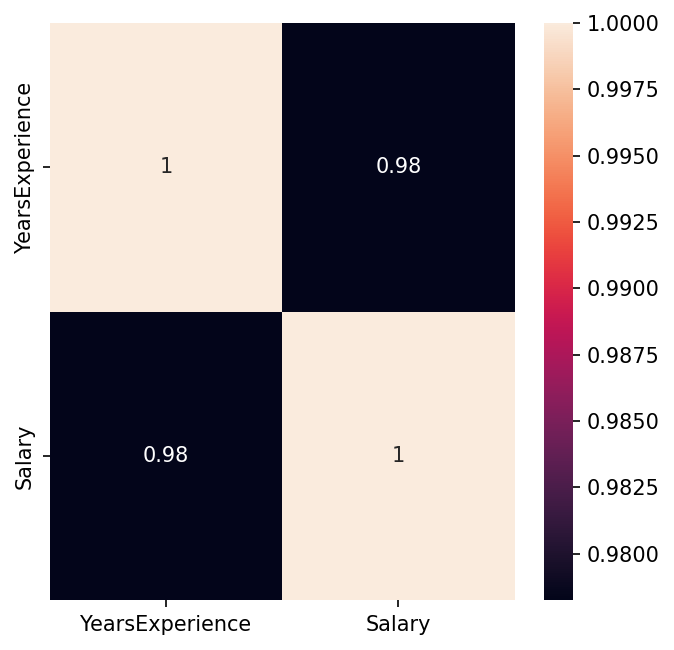

In [131]:
sns.heatmap(norm_data.corr(),annot=True)

very high correlation

### DATA SPLITTING

In [54]:
norm_data.shape

(30, 2)

In [84]:
x = np.array(norm_data['YearsExperience']).reshape((-1,1))
y = norm_data['Salary']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [95]:
len(x_test), len(x_train), len(y_test), len(y_train)

(6, 24, 6, 24)

### TRAINING MODEL & PREDTICTIONS

In [89]:
model = LinearRegression()

In [90]:
model.fit(x_train,y_train)

LinearRegression()

In [101]:
y_pred = model.predict(x_test)

### MODEL EVALUATION

In [102]:
r2_score(y_test, y_pred)

0.993422386435995

In [104]:
mean_absolute_error(y_test, y_pred)

0.022531922460378277

In [105]:
mean_squared_error(y_test, y_pred)

0.0006885381018367607

In [106]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.026240009562436533

In [107]:
residual = y_test - y_pred

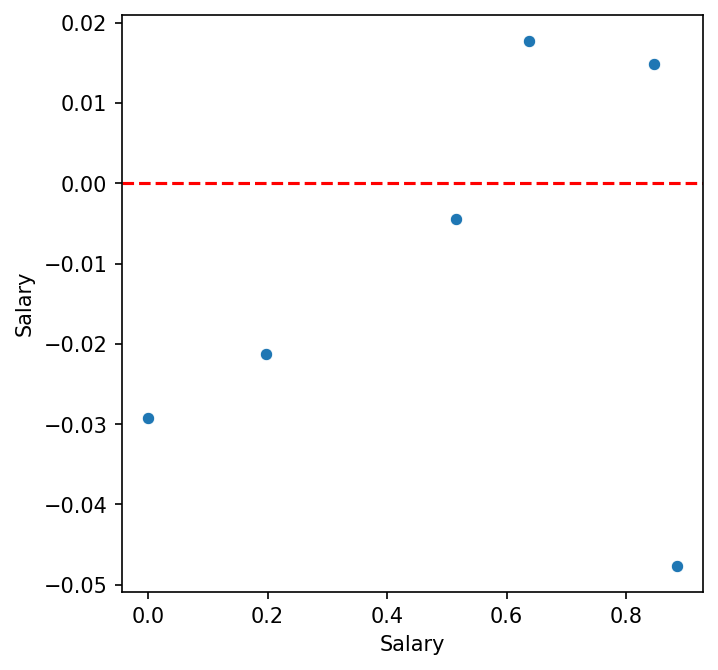

In [108]:
sns.scatterplot(x = y_test, y = residual)
plt.axhline(color = 'red',linestyle = '--')

#### interpretation
- as we can see from the r2 value itself that the model is perfroming good, value of r2 near to 1 shows model is perfroming best for the given data
- from the residual plot we cant observe any pattern, so from this we can visually evaluate the model and hence we can say that our model performed best